In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)

# Plotting and Visualization

In [2]:
import matplotlib.pyplot as plt

## A Brief matplotlib API Primer

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

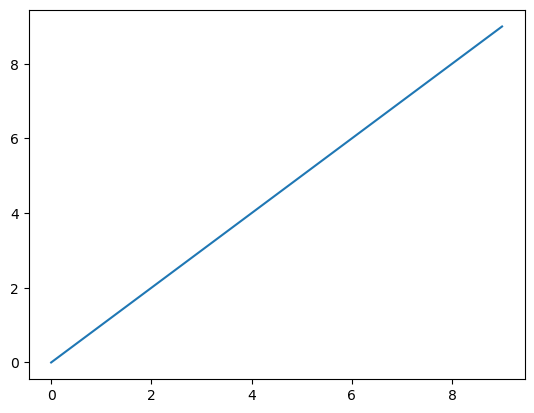

In [4]:
plt.plot(data)

### Figures and Subplots

- Create a new figure with plt.fiqure

In [5]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

- You can't make a plot with a blank figure. You have to create one or more **subplots** using add_subplot

In [6]:
ax1 = fig.add_subplot(2,2,1) 
# figure should be 2 X 2 (so up to four plots in total.)

In [7]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

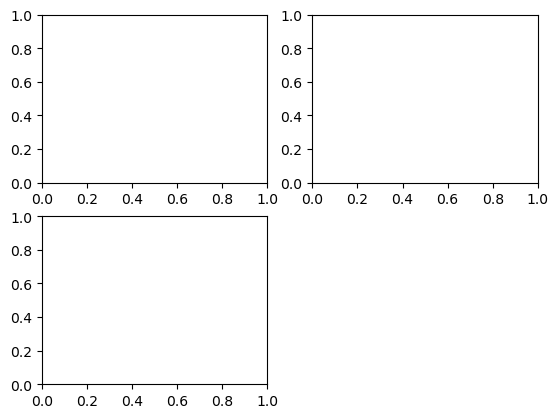

In [8]:
fig

In [9]:
ax3.plot(np.random.standard_normal(50).cumsum(), color = "black" , linestyle = "dashed")

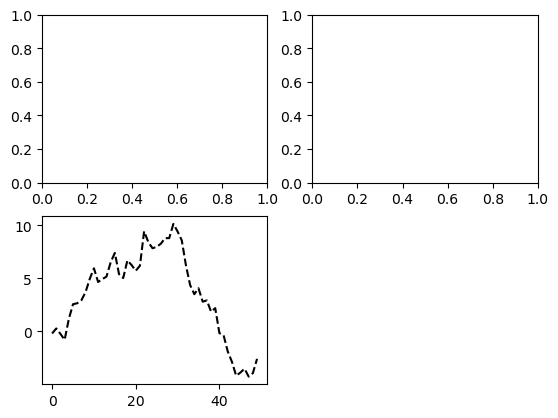

In [10]:
fig

In [11]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
# alpta = 3.0 sets the transparency of the overlaid plot

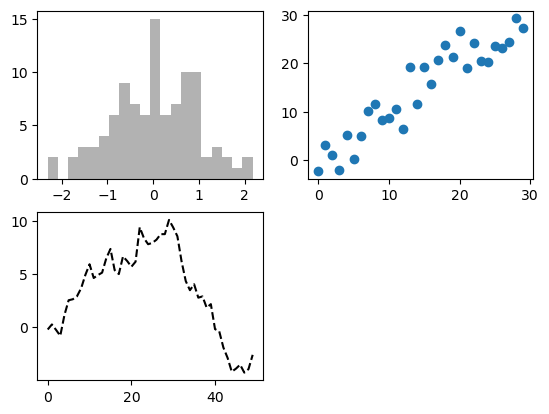

In [12]:
fig

- matplotlib.pyplot.subplots options  

|Argument|Description|
|--------|-----------|
|nrows|Number of rows of subplots|
|ncols|Number of columns of subplots|
|sharex|All subplots should use the same x-axis ticks(adjusting the xlim will affect all subplots)|
|sharey|All subplots should use the same y-axis ticks(adjusting the ylim will affect all subplots)|
|subplot_kw|Dictionary of keywords passed to add_subplot call used to create each subplot|
|**fig_kw|Additional keywords to subplots are used when creating the figure, such as plt.subplots(2,2,fiqsize=(8, 6))|

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

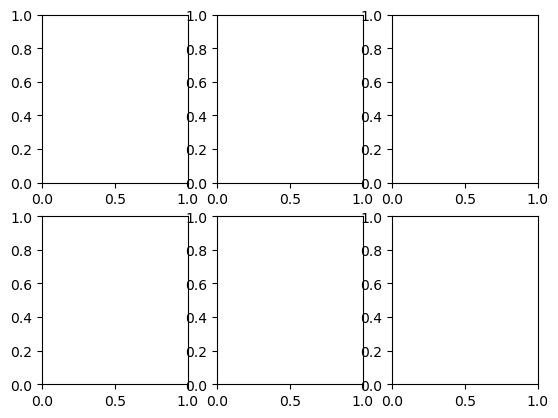

In [13]:
fig ,axes = plt.subplots(2,3)
axes

In [14]:
plt.close("all")

#### Adjusting the spacing around subplots

- Change the spacing using the subplots_adjust method on Figure objects

```python
subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
```

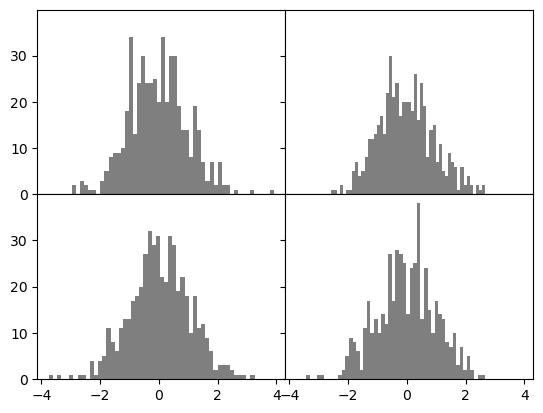

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

```python
ax.plot(x,y, linestyle = "--", color = "green")
```

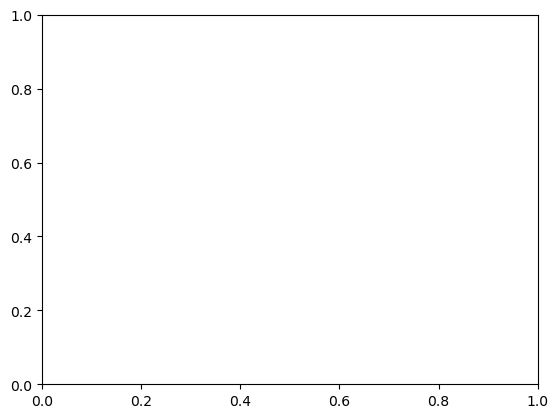

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

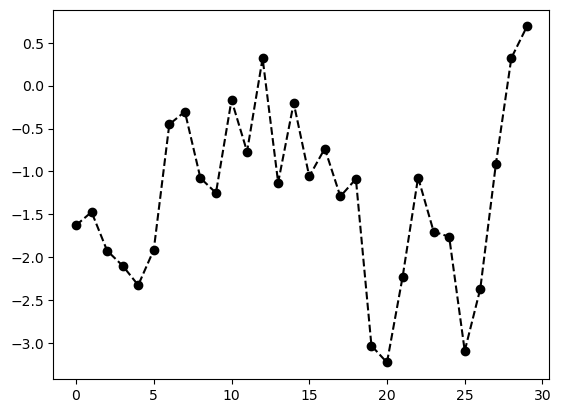

In [17]:
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");
fig

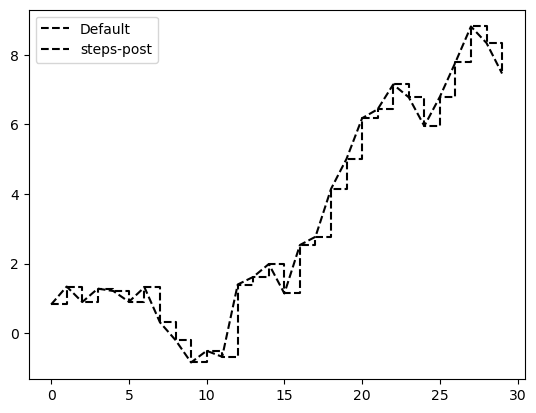

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and tick labels

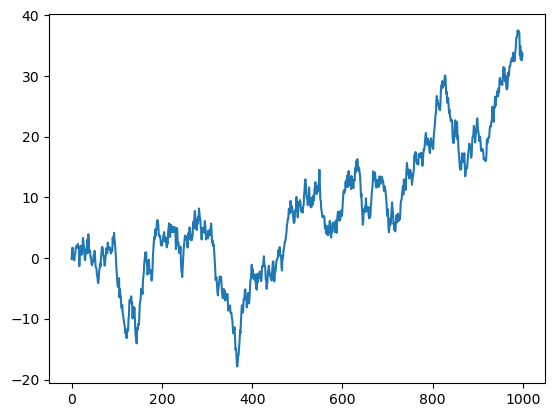

In [19]:
fig , axe = plt.subplots()
axe.plot(np.random.standard_normal(1000).cumsum()) # with default labels

Text(0.5, 1.0, 'My first matplotlib plot')

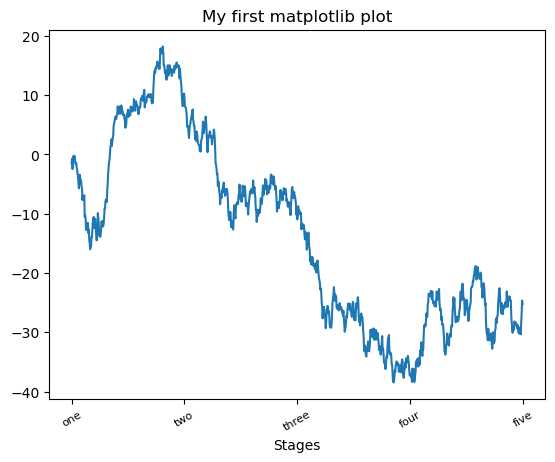

In [22]:
fig , ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

#### Adding legends

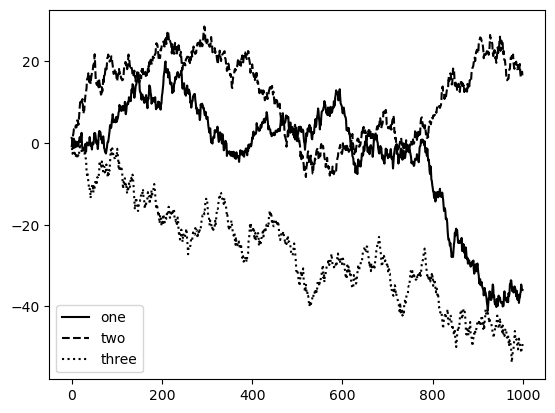

In [23]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");
ax.legend()

### Annotations and Drawing on a Subplot

- text draws text at given coordinates(x,y) on the plot with optional custom styling

```python
ax.test(x,y, "Hello world!", familty = "monospace", fontsize = 10)
```

In [24]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

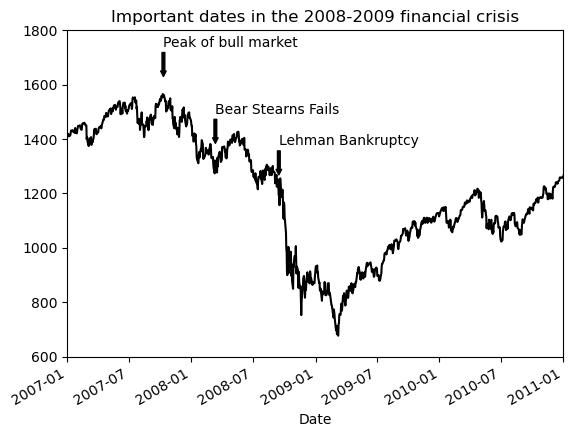

In [25]:
fig, ax = plt.subplots()
data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, color = "black")
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")
ax.set_xlim(["1/1/2007", "1/1/2011"]) # x축 범위 지정
ax.set_ylim([600, 1800]) # y축 범위 지정
ax.set_title("Important dates in the 2008-2009 financial crisis")

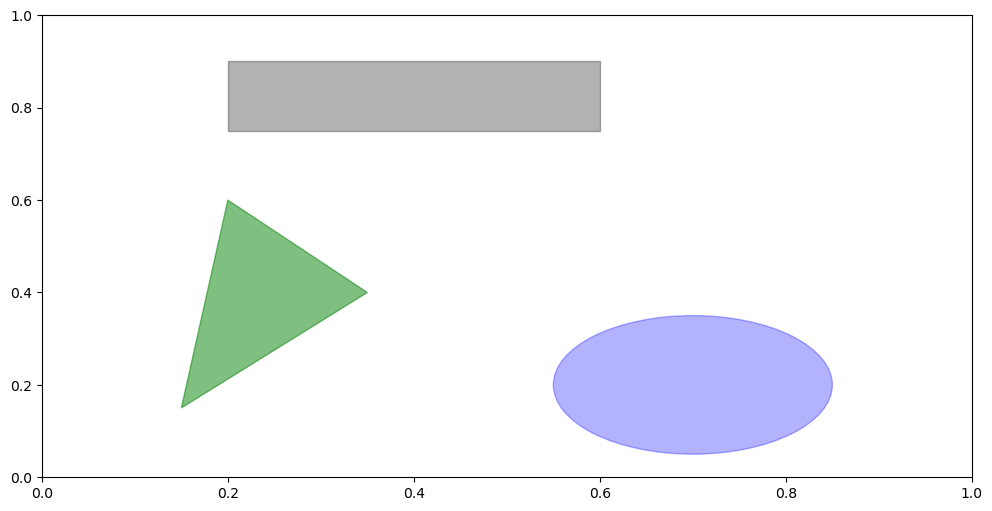

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


### Saving Plots to File

```python
fig.savefig("figpath.svg")
fig.savefig("figpath.png",dpi=400)
```

- Some fig.savefig options  

|Argument|Description|
|--------|-----------|
|fname|String containing a filepath or a Python file-like object. The figure format is inferred from the file extension(e.g., .pdf for PDF or .png for PNG)|
|dpi|The figure resolution in dots per inch; defaults to 100 in IPython or 72 in Jupyter out of the box but can be configured.|
|facecolor,edgecolor|The color of the figure background outsid of the subplots; "w"(white),by default.|
|format|The explicit file format to use("png","pdf","svg","ps","eps"..)|

### matplotlib Configuration

- Set the global default figure size to be 10 X 10  

```python
plt.rc("figure", figsize=(10,10))
```

```python
plt.rc("font", family = "monospace", weight = "bold",size=8)
```

The first argument to rc is the component you wish to customize, such as "figure", "axex", "xtick","ytick","grid","legend", or may other. Afther that can follow a sequence of keyword arguments indicating the new parameters

## Plotting with pandas and seaborn

### Line Plots 

- df.plot() is equivalent to df.plot.line()

- Series.plot method arguements  

|Argument|Description|
|--------|-----------|
|label|Label for plot legend|
|ax|matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot|
|style|Style string, like "ko--", to be passed to matplotlib|
|alpha|The plot fill opacity(from 0 to 1)|
|kind|Can be "area", "bar", "barh", "density", "hist", "kde", "line" , or "pie"; defaults to "line|
|figsize|Size of figure object to create|
|logx|Pass True for logarithmic scaling on the x axis; pass "sym" for symmetric logarithm that permits negative values|
|logy|Pass True for logarithmic scaling on the y axis; pass "sym" for symmetric logarithm that permits negative values|
|title|Title to use for the plot|
|use_index|Use the object index for tick labels|
|rot|Rotation of tick labels 0 through 360|
|xticks|Values to use for x-axis ticks|
|yticks|Valuse to use for y-axis ticks|
|xlim|x-axis limits(e.g., [0,10])|
|ylim|y-axis limits|
|grid|Display axis grd(off by default)|

<AxesSubplot: >

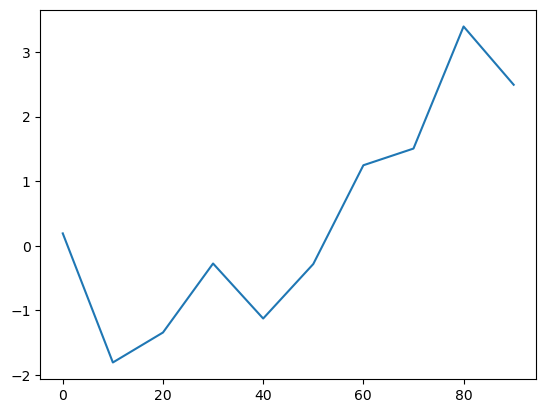

In [29]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,100,10))
s.plot()

- DataFrame - specific plot arguments

|Argument|Description|
|--------|-----------|
|subplots|Plot each DataFrame column in a separate subplot|
|layouts|2-tuple(rows,columns) providing layout of subplots|
|sharex|If subplots=True, share the same x-axis, linking ticks and limits|
|sharey|If subplots=True, share the same y-axis|
|legend|Add a subplot legend(True by default)|
|sort_columns|Plot Columns in alphabetical order; by default uses existing column order|

<AxesSubplot: >

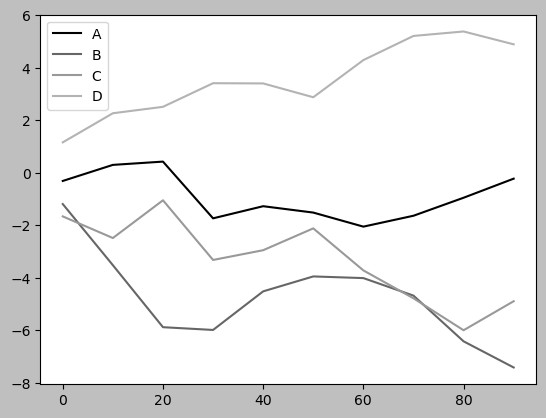

In [30]:
#! ipython id=1ef68f01e6f248259804975945e44951
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

### Bar Plots

- plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively

- Series or DataFrame index will be used as the x or y ticks

<AxesSubplot: >

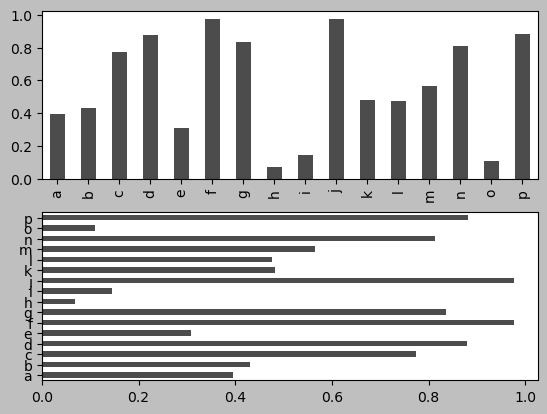

In [33]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color='black', alpha = 0.7)
data.plot.barh(ax=axes[1],color="black", alpha = 0.7)

In [34]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.794038,0.625282,0.552275,0.337246
two,0.469806,0.112525,0.160731,0.138336
three,0.228451,0.487867,0.755719,0.408036
four,0.616313,0.215839,0.921119,0.267448
five,0.450353,0.778918,0.200190,0.235503
six,0.911689,0.524273,0.114242,0.514429


<AxesSubplot: >

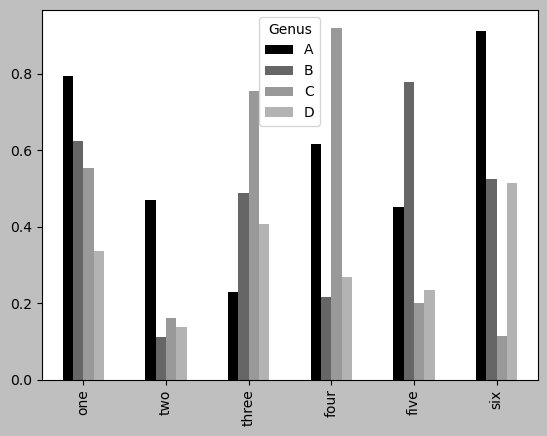

In [35]:
df.plot.bar()

In [36]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<AxesSubplot: >

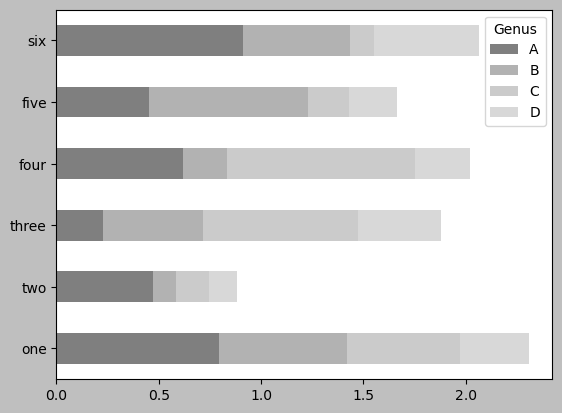

In [39]:
df.plot.barh(stacked=True, alpha=0.5)

In [40]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [41]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [42]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [43]:
party_counts = party_counts.loc[:, 2:5]

In [46]:
party_pcts = party_counts.div(party_counts.sum(axis=1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<AxesSubplot: xlabel='day'>

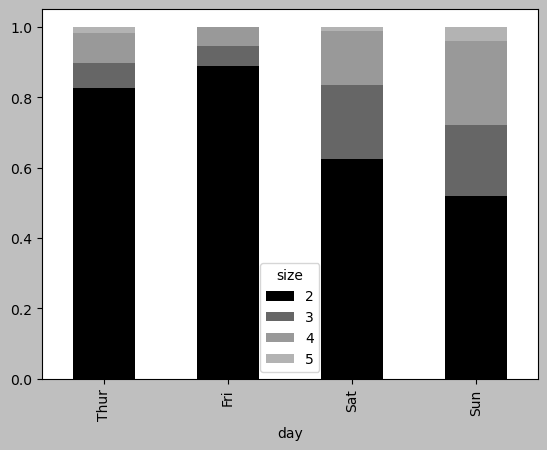

In [47]:
party_pcts.plot.bar(stacked = True)

In [48]:
import seaborn as sns

In [49]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot: xlabel='tip_pct', ylabel='day'>

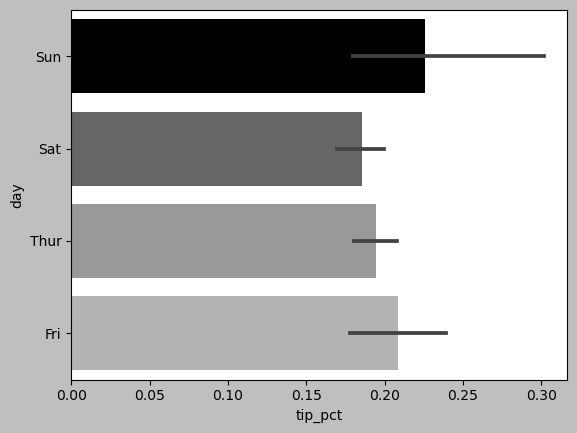

In [50]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

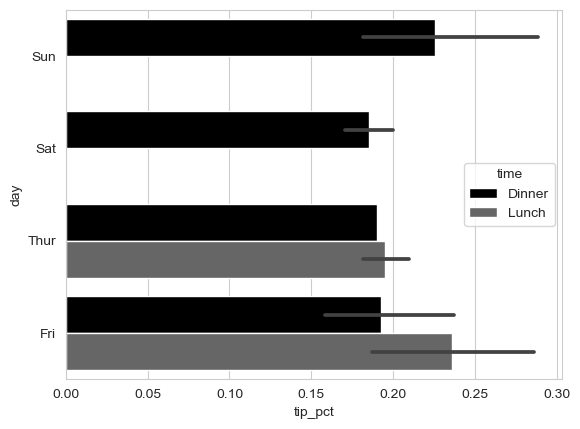

In [54]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")
sns.set_style("whitegrid")

### Histograms and Denstiy Plots

<AxesSubplot: ylabel='Frequency'>

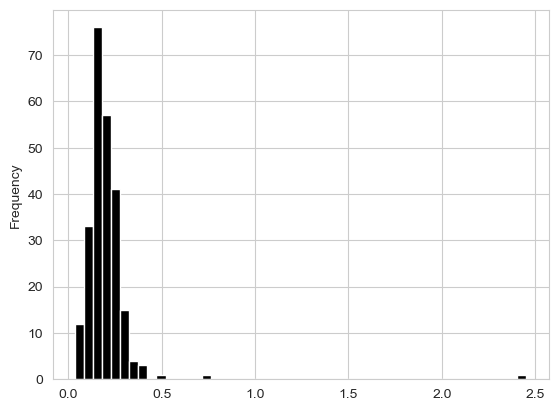

In [56]:
tips["tip_pct"].plot.hist(bins=50)


<AxesSubplot: ylabel='Density'>

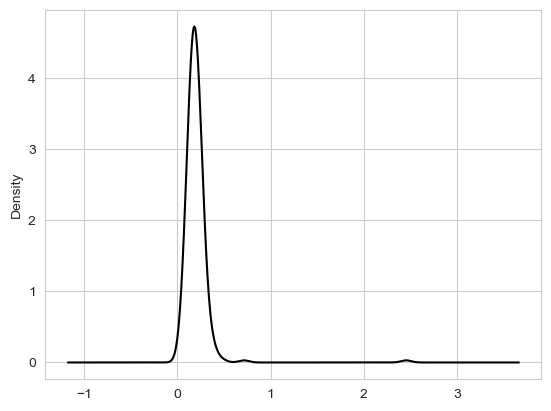

In [55]:
tips["tip_pct"].plot.density()

<AxesSubplot: ylabel='Count'>

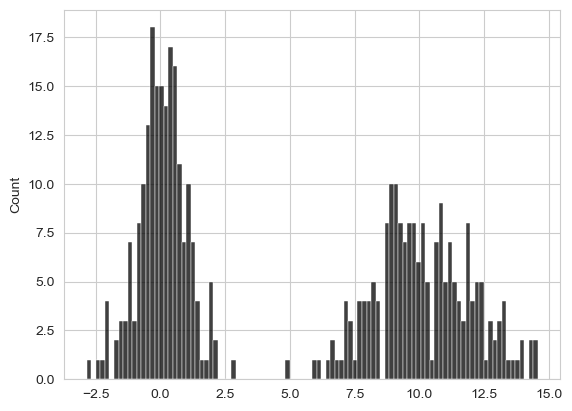

In [59]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1,comp2]))

sns.histplot(values, bins = 100, color='black')

### Scatter or Point Plots

In [62]:
macro = pd.read_csv("macrodata.csv")
data = macro[['cpi', 'm1','tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [63]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

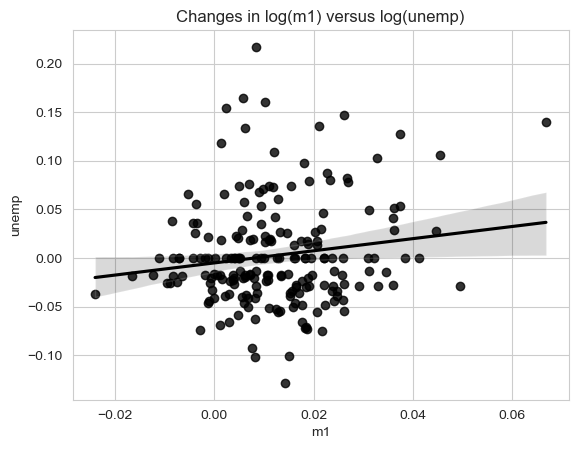

In [67]:
ax = sns.regplot(x='m1', y = 'unemp', data = trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

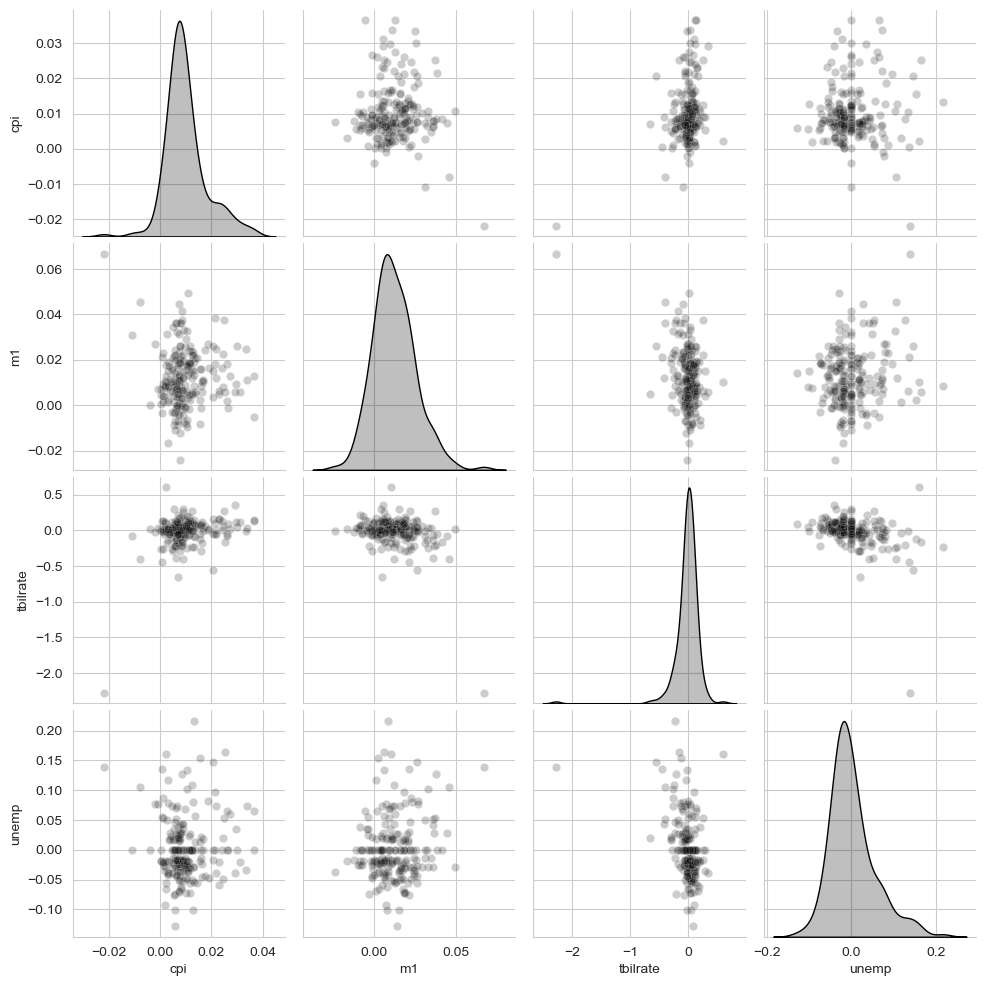

In [68]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### Facet Grids and Categorical Data

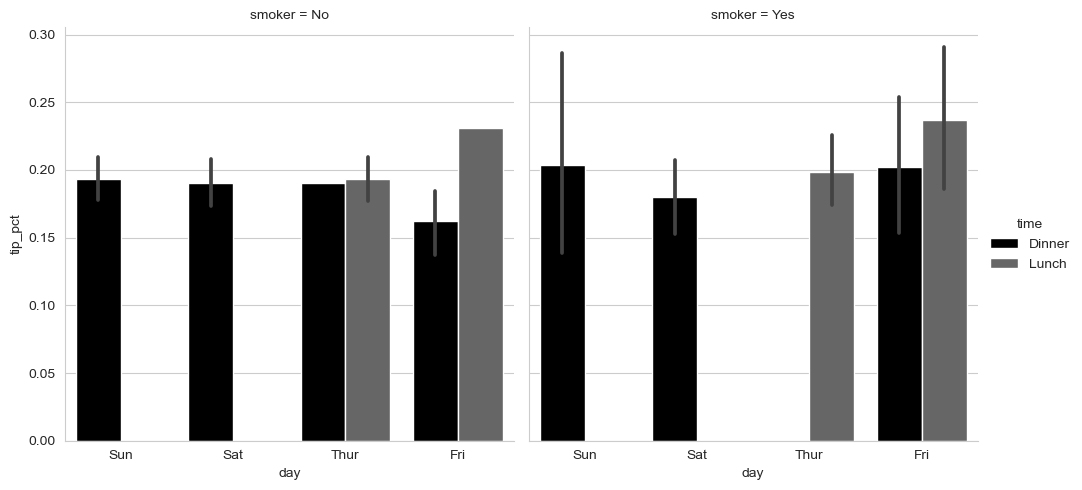

In [69]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

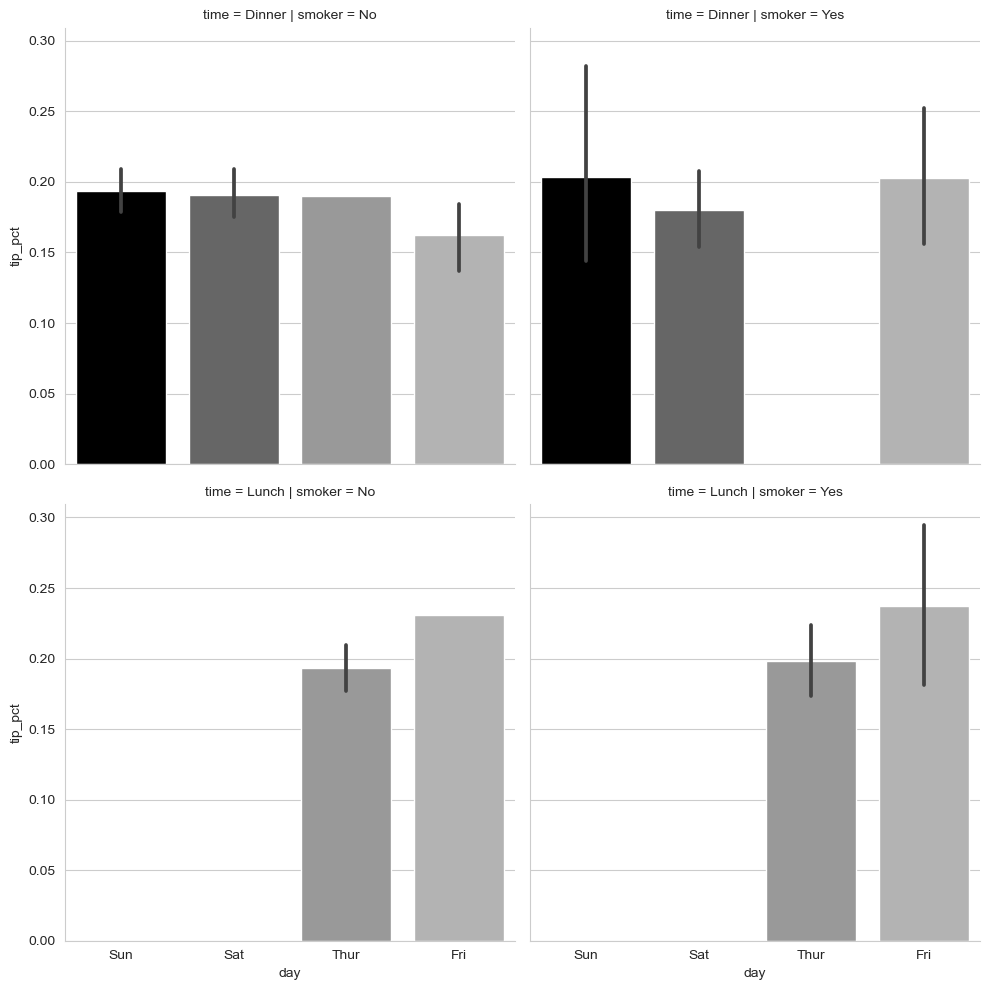

In [70]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

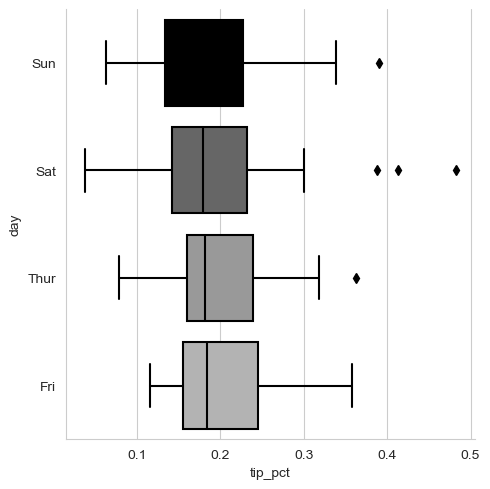

In [71]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])